# **1. Perkenalan Dataset**


Dataset : UCI Heart Disease Data - Redwan Sony 
berisi data kesehatan yang diperuntukan untuk memprediksi apakah seseorang terkena penyakit jantung atau tidak

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

print("Library berhasil di-import!")

Library berhasil di-import!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../raw_data/heart_disease_uci.csv')

print("Data Berhasil di-load!")
df.head()

Data Berhasil di-load!


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Nama kolom telah diubah:
['id', 'Umur', 'Jenis_Kelamin', 'dataset', 'Tipe_Nyeri_Dada', 'Tekanan_Darah', 'Kolesterol', 'Gula_Darah_Puasa', 'Hasil_EKG', 'Detak_Jantung_Maks', 'Angina_Olahraga', 'Depresi_ST', 'Kemiringan_ST', 'Jml_Pembuluh_Utama', 'Thalassemia', 'Keparahan_Penyakit']

--- Info Dataset Terbaru ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  920 non-null    int64  
 1   Umur                920 non-null    int64  
 2   Jenis_Kelamin       920 non-null    object 
 3   dataset             920 non-null    object 
 4   Tipe_Nyeri_Dada     920 non-null    object 
 5   Tekanan_Darah       861 non-null    float64
 6   Kolesterol          890 non-null    float64
 7   Gula_Darah_Puasa    830 non-null    object 
 8   Hasil_EKG           918 non-null    object 
 9   Detak_Jantung_Maks  865 non-null    flo

,id,Umur,Tekanan_Darah,Kolesterol,Detak_Jantung_Maks,Depresi_ST,Jml_Pembuluh_Utama,Keparahan_Penyakit
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


C:\Users\UsEr\AppData\Local\Temp\ipykernel_7760\4289582539.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Keparahan_Penyakit', data=df, palette='viridis')


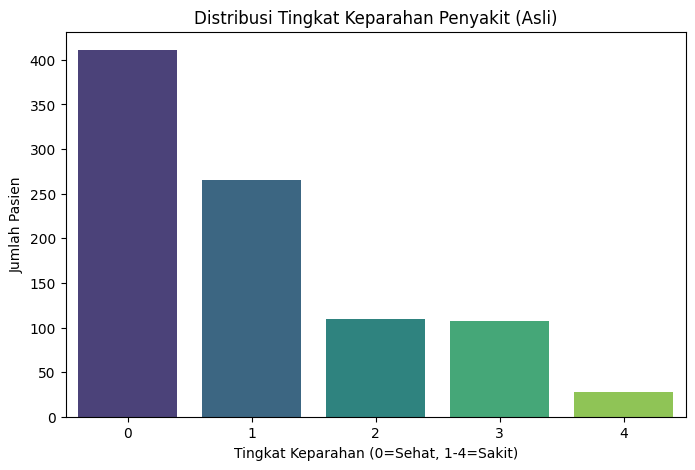


Jumlah Missing Values per Kolom:
id                      0
Umur                    0
Jenis_Kelamin           0
dataset                 0
Tipe_Nyeri_Dada         0
Tekanan_Darah          59
Kolesterol             30
Gula_Darah_Puasa       90
Hasil_EKG               2
Detak_Jantung_Maks     55
Angina_Olahraga        55
Depresi_ST             62
Kemiringan_ST         309
Jml_Pembuluh_Utama    611
Thalassemia           486
Keparahan_Penyakit      0
dtype: int64


In [4]:
# --- A. Rename Kolom (Agar Mudah Dipahami) ---
# Mapping ini DISESUAIKAN dengan nama kolom asli di file CSV Anda
rename_mapping = {
    'age': 'Umur',
    'sex': 'Jenis_Kelamin',
    'cp': 'Tipe_Nyeri_Dada',
    'trestbps': 'Tekanan_Darah',
    'chol': 'Kolesterol',
    'fbs': 'Gula_Darah_Puasa',
    'restecg': 'Hasil_EKG',
    'thalch': 'Detak_Jantung_Maks',  # Perhatikan: di CSV tulisannya 'thalch'
    'exang': 'Angina_Olahraga',
    'oldpeak': 'Depresi_ST',
    'slope': 'Kemiringan_ST',
    'ca': 'Jml_Pembuluh_Utama',
    'thal': 'Thalassemia',
    'num': 'Keparahan_Penyakit'      # Target Asli (0-4)
}

# Lakukan rename jika kolomnya ada
df.rename(columns=rename_mapping, inplace=True)

print("Nama kolom telah diubah:")
print(df.columns.tolist())

# --- B. EDA Visualisasi ---
print("\n--- Info Dataset Terbaru ---")
df.info()

print("\n--- Statistik Deskriptif ---")
display(df.describe())
        
# 1. Visualisasi Target Asli (Keparahan Penyakit 0-4)
plt.figure(figsize=(8, 5))
# Pastikan kolom 'Keparahan_Penyakit' ada
if 'Keparahan_Penyakit' in df.columns:
    sns.countplot(x='Keparahan_Penyakit', data=df, palette='viridis')
    plt.title('Distribusi Tingkat Keparahan Penyakit (Asli)')
    plt.xlabel('Tingkat Keparahan (0=Sehat, 1-4=Sakit)')
    plt.ylabel('Jumlah Pasien')
    plt.show()

# 2. Cek Missing Values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# --- A. Cleaning & Feature Engineering ---
df_clean = df.copy()

# 1. Membuat Kolom Target Biner (0 vs 1)
# Kita ambil dari kolom 'Keparahan_Penyakit' (dulunya 'num')
if 'Keparahan_Penyakit' in df_clean.columns:
    # Buat kolom baru bernama 'Target': 0 = Sehat, 1 = Sakit (nilai 1,2,3,4 dijadikan 1)
    df_clean['Target'] = df_clean['Keparahan_Penyakit'].apply(lambda x: 1 if x > 0 else 0)
    
    # Hapus kolom lama agar tidak bocor ke training
    df_clean.drop(columns=['Keparahan_Penyakit'], inplace=True)
    print(" Kolom 'Target' berhasil dibuat (0=Sehat, 1=Sakit).")

# 2. Menghapus Kolom Tidak Relevan
# Di file Anda ada 'id' dan 'dataset'
cols_to_drop = ['id', 'dataset']
for col in cols_to_drop:
    if col in df_clean.columns:
        df_clean.drop(columns=[col], inplace=True)
print(" Kolom 'id' dan 'dataset' telah dihapus.")

# 3. Menangani Missing Values
# Pisahkan kolom angka dan kategori
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

# Isi Angka dengan Mean
for col in num_cols:
    if col != 'Target': # Jangan ubah target
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Isi Kategori dengan Modus
for col in cat_cols:
    if len(df_clean[col].mode()) > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(" Missing values berhasil ditangani.")

# --- B. Encoding (Mengubah Teks jadi Angka) ---
le = LabelEncoder()
for col in df_clean.columns:
    # Encode kolom tipe Object (Teks) atau Boolean (True/False)
    if df_clean[col].dtype == 'object' or df_clean[col].dtype == 'bool':
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))
print(" Encoding selesai.")

# --- C. Data Splitting ---
X = df_clean.drop('Target', axis=1) 
y = df_clean['Target']

# Split Data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n Proses Preprocessing Selesai!")
print(f"Shape Data Train: {X_train.shape}")
print(f"Shape Data Test: {X_test.shape}")

# Tampilkan data akhir
df_clean.head()

✅ Kolom 'Target' berhasil dibuat (0=Sehat, 1=Sakit).
✅ Kolom 'id' dan 'dataset' telah dihapus.
✅ Missing values berhasil ditangani.
✅ Encoding selesai.

🚀 Proses Preprocessing Selesai!
Shape Data Train: (736, 13)
Shape Data Test: (184, 13)


C:\Users\UsEr\AppData\Local\Temp\ipykernel_7760\2996706135.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\UsEr\AppData\Local\Temp\ipykernel_7760\2996706135.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,Umur,Jenis_Kelamin,Tipe_Nyeri_Dada,Tekanan_Darah,Kolesterol,Gula_Darah_Puasa,Hasil_EKG,Detak_Jantung_Maks,Angina_Olahraga,Depresi_ST,Kemiringan_ST,Jml_Pembuluh_Utama,Thalassemia,Target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
